# Data analysis of Ames, IA Housing dataset- Part II: What factors contribute most in determining home sale prices? How well can the data be used to predict home prices?

# Overview of Part II: 
# Code will continue with more detailed exploratory data analysis, such as the correlations between each variable, and the simple linear correlations between each variable and the outcome variable (i.e., SalePrice). 

# For example, these correlaitons will be examined via data visualizations: a.) a correlation coefficient matrix, whic shows the correlation between each pair of variables in the dataset; and b.) a barplot showing a ranking of variables in terms of the correlaiton between each covariate and the outcome variable.

# Finally, some scatter plots will be implemented to visualize some simple correlatons between some of the more prominent covariates with that of the outcome variable. 

# Data analysis and visualization imports

In [2]:
#For data analysis modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import vsualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset. 

# Specify a range for the columns (namely, for the 2nd through 118th columns, i.e., all but the first column), so the "Unnamed" column is not imported (this will save on 1-2 longer lines of code, since that column would need to be deleted from the dataframe). 

In [19]:
# since the first column is unnamed and does not actually contain data, specify a range to avoid importing this column
range_1 = [i for i in range(1,119)]

#input the specified range as the argument for the pd.read_csv's usecols parameter
usecols = range_1

df_housing = pd.read_csv('Amex_IA_dataset_cleaned.csv', usecols=usecols)
df_housing.head(10)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,1,NaN
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,0,0,0,NaN
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,NaN
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,1,0,0,0,0,0,0,0,NaN
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,NaN


# Exploratory data analysis- continued: 
# What are the correlations between each numeric variable?

# Calculate and display correlations between each numeric variable (i.e., excluding indicator and object variables) in the dataset

# Create a list of all columns from the dataset that are specifically of a numeric data type: i.e., integer or float

In [31]:
# for purposes of finding correlations with SalePrice, create a new Index object and convert to list with all numeric columns from the  dataframe
numeric = df_housing.select_dtypes(include=['int64','float64']).columns

#drop the SalePrice column (since we don't want to see the correlation with itself) and ID (since it does not have any actual data for examining correlations) from the numeric Series
numeric = numeric.drop(['Id','SalePrice']) 

#convert to list
numeric  = list(numeric)

numeric

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In the following several cells of code, a plot will be implemented of a diagonal correlation matrix: i.e., a triangular-shaped correlation matrix, which shows the correlation of each variable with each other. 

# "Conventional" correlation coefficient matrix: 
## correlations between each variable and home SalePrice, and correlations between each possible numeric variable pair in the dataset

In [39]:
#calculate the correlations of each variable to SalePrice
corr = df_housing[['SalePrice'] + numeric].corr()

#display correlations
corr

,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
SalePrice,1.000000,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,...,0.623431,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923
MSSubClass,-0.084284,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotArea,0.263843,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.790982,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.077856,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.522897,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.507101,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.477493,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,0.386420,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.011378,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


# Correlation matrix plot, via seaborn heatmap method:
## Regarding the legend: The darker red hues indicate higher positive correlation; the darker blue hues indicate higher negative correlation

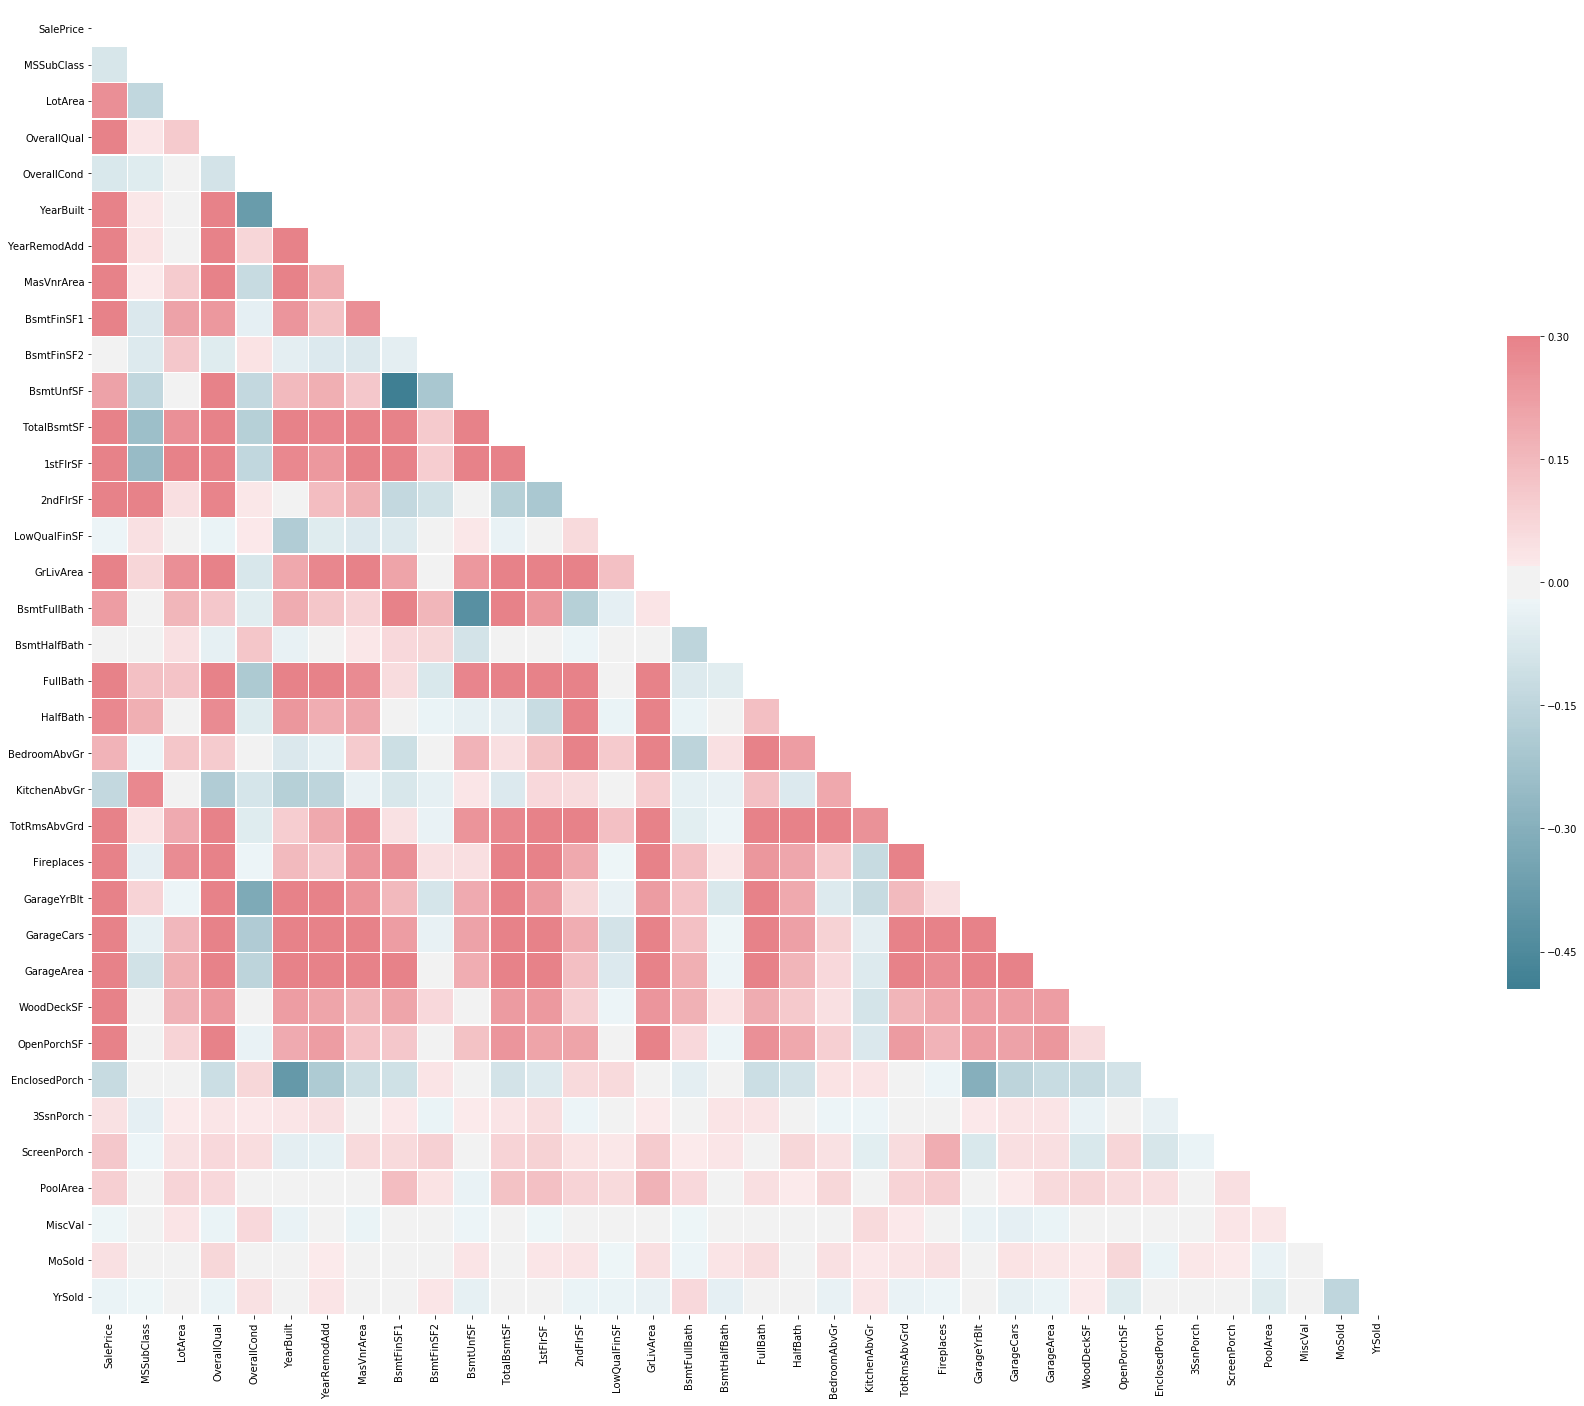

In [40]:
#Initialize the plot
f, ax = plt.subplots(figsize=(40,24))

#Creates a mask to generate an upper triangular shape

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up a color map with a diverging palette of 3 colors
#(darker red equals higher positive correlation, white equals no correlation, and blue equals higher negative correlation)
cmap= sns.diverging_palette(220,10, as_cmap = True)

#Notice the plot has a triangular shape, and the levels and intensity of positive and negative correlations are shown with 2 diverging colors.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws ={"shrink": .5})

# Analysis of correlation matrix plot:

# Notice the plot shows each possible pairwise correlation for the various variables in the dataset. The plot has 2 color schemes: the darker the red color is, the higher the positive correlation

# For example, the year the home was built ("YearBuilt") is positively correlated with the overall quality of the home. This makes ense since older homes will be more deterioated or less well-built (most likely) on average. Newer homes might be made of better build materials as well. 

# Many other variables also show a positive correlation with Saleprice, such as whether a home has a fulll bath, the garage area/size, the LotFrontage, the number of bedrooms (BedroomAbvGr), whether there are any fireplaces, etc.

# Similarly, the correlation matrix plot shows the correlation between each of the covariates. For example, newer homes are more likely to have a larger and newer garage, a full or half bath, and a larger basement.

# The correlation matrix plot shows all possible correlations between each variable.

# While this is useful to know, it would also be useful to see the ranking of how much each variable is correlated with SalePrice.

# To get a better sense of which variables have the highest negative and positive correlation with SalePrice,a barplot will be implemented, with the correlations sorted from the highest negative correlation to the highest positive correlation.

# Ranking of correlations with SalePrice via barplot visualization: 

## I.e.: a barplot of simple correlations of each numeric variable with respect to SalePrice, in descending order

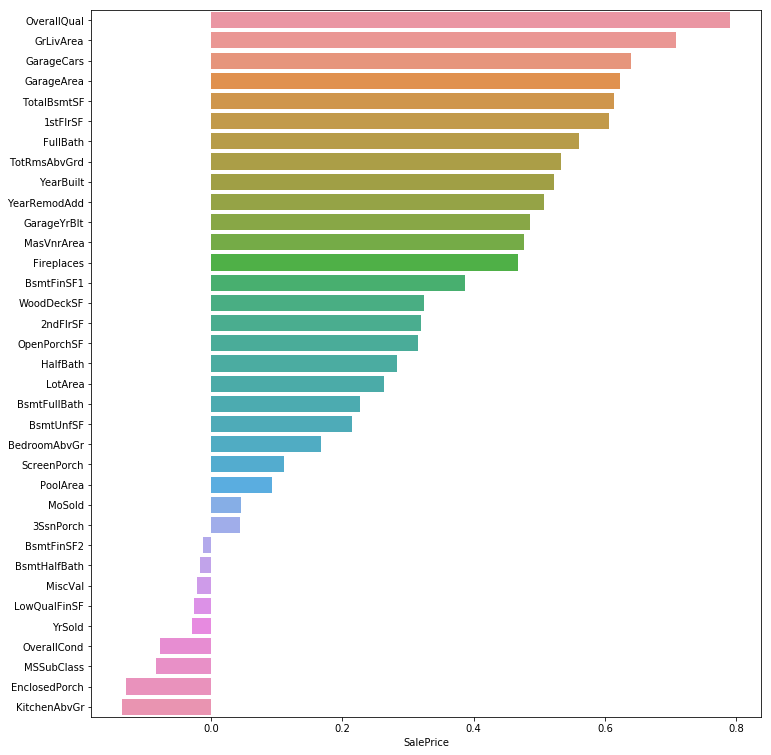

In [36]:
#sort the correlations by ascending: i.e., negative to highest positive
corr2 = corr2.sort_values('SalePrice', ascending=False)

#initialize the figure and dimensions of the correlations with SalePrice
plt.figure(figsize=(12,13))

#use a barplot via Seaborn, and show the correlations with SalePrice
sns.barplot(corr2.SalePrice[1:], corr2.index[1:])
                   
plt.show()

# Analysis of plot:

## In general, a home's characteristics and build quality contribute the highest to a home's sale price. OverallQual (i.e., the overall quality of the home: e.g., the exterior build quality, kitchen quality) has the highest positive correlation with SalePrice, with a solid ~77-78% correlation. 

## GrLivArea (i..e, the size of the aboveground living area), Garagecars (the number of cars a given home's garage can fit), and Total Basement Square footage (TotalBsmtSF) all rank quite highly as well, with correlations ranging from 60-70%.

## By contrast, KitchensAbvgr (i.e., the number of kitchens situated above ground) has, oddly enough, a moderate negative correlation, at about -15 to -20%. The year when a home was sold (YrSold) shows a slight negative correlation, but perhaps this is due (at least in part) to the major housng bust (2007-2009) during 2 of the 5 years (inclusive) for this dataset

## EnclosedPorch also has a moderate negative correlation, only slightly less so than KitchensAbvGr.

# Scatter plots of various variables vs SalePrice

## Plot of LotArea and sale price

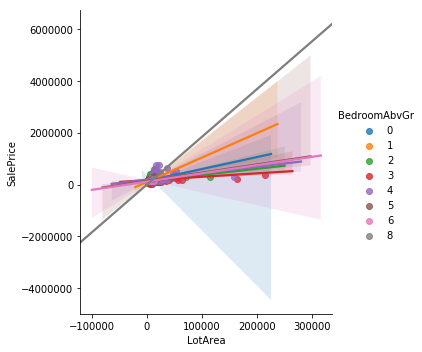

In [73]:
#plot of LotArea vs home sale price, as compared (i.e., hue) by the number of total rooms above ground
sns.lmplot(x='LotArea', y = 'SalePrice', data=df_housing, hue='BedroomAbvGr')

## While there is a bit of a positive correlation between SalePrice and LotArea, the correlation is fairly weak. The number of bedrooms above ground ("BedroomAbvGrd") does show a bit of a connection with Sale Price since the LotArea has more of an association with SalePrice with specific number of rooms. 

## Apparently a very high number of bedrooms-namely, 8--shows a very high correlation with average SalePrice. This is likely associated with the size of a home. However, it's very unusual that only having 1 bedroom is somehow associated with a higher average sale price, given the LotArea size, than numbers of bedrooms ranging from 2-6. 

# Plot of Total square feet of above-ground living area ('GrLivArea') vs SalePrice

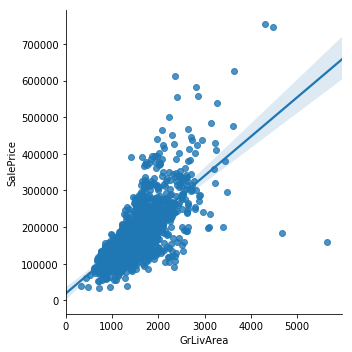

In [81]:
sns.lmplot(x= 'GrLivArea', y = 'SalePrice', data=df_housing)

## As expected, there is a very strong positive correlation between GrLiveArea and SalePrice. However, there are some notable outliers, particularly a few that have a high amount of living space, but have a substantially lower-than-expected sale price. 

## Perhaps this is due to being situated in a different neighborhood ("location, location, location?"). While neighborhood could be shown as a hue, this would be impractical since there are so many neighborhoods within the dataset.

# Plot of number of bedrooms above ground vs Sale Price, compared by the number of fireplaces

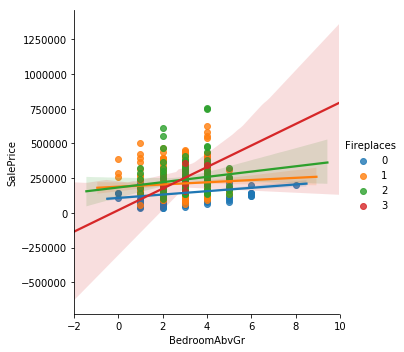

In [72]:
sns.lmplot(x='BedroomAbvGr', y = 'SalePrice', data =df_housing, hue='Fireplaces')

## The plot suggests that there are only small returns in getting 1 or 2 fireplaces, even when the number of bedrooms is high. However, with 3 fireplaces, the average sale price tends to increase by a fairly substantial margin.

# Plot of OverallCond (i.e., overall rated condition of a home) vs SalePrice

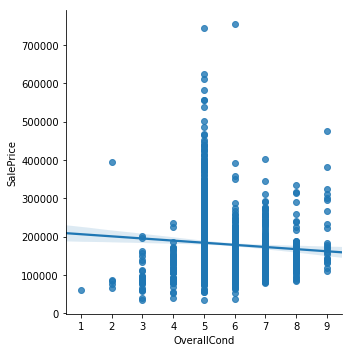

In [69]:
sns.lmplot(x='OverallCond', y = 'SalePrice', data =df_housing) 

## This plot shows a counter-intuitive correlation: the average SalePrice peaks at an overall home condition rating of 5. This suggests that the condition of a home provides diminishing marginal returns (and even flat-out diminishing returns) after the home condition increases beyond a good condition (i.e., 5). Thus, homes in prestine condition do not necessarily fetch a higher sale price than homes with a good, but less than stellar, condition. 